## Natural Language Processing

In [145]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import swifter
from sklearn.feature_extraction.text import TfidfTransformer

%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

In [146]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/admin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [147]:
data = pd.read_csv("/Users/admin/Desktop/EDA/NLP/input_data.csv")


In [148]:
data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [149]:
data.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8498 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [151]:
def clean_col(name):
    return(name.strip().lower().replace(" ","_"))
data = data.rename(columns=clean_col)

In [152]:
data.columns

Index(['short_description', 'description', 'caller', 'assignment_group'], dtype='object')

In [153]:
print(data['assignment_group'].mode())
print(data['caller'].mode())

0    GRP_0
Name: assignment_group, dtype: object
0    bpctwhsn kzqsbmtp
Name: caller, dtype: object


In [154]:
#finding missing values
sd = data[data.isnull().any(axis=1)]
sd

,short_description,description,caller,assignment_group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [155]:
data['description'].fillna(data['short_description'], inplace=True)

In [156]:
print(sd['description'][2604])
print(sd['description'][3383])



received from: ohdrnswl.rezuibdt@gmail.com

hi,



link is not working. kindly resolve yhe issue on urgent basis.



best 

-connected to the user system using teamviewer.
-help the user login to the portal.
-issue resolved.


In [157]:
data.at[2604,'short_description']="link is not working"
data.at[3383,'short_description']="connected to the user system using teamviewer.help the user login to the portal."


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   short_description  8500 non-null   object
 1   description        8500 non-null   object
 2   caller             8500 non-null   object
 3   assignment_group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [159]:
print(data.caller.nunique())
data.caller.unique()

2950


array(['spxjnwir pjlcoqds', 'hmjdrvpb komuaywn', 'eylqgodm ybqkwiam', ...,
       'bjitvswa yrmugfnq', 'oybwdsgx oxyhwrfz', 'kqvbrspl jyzoklfx'],
      dtype=object)

In [160]:
print(data.assignment_group.nunique())
data.assignment_group.unique()

74


array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [161]:
count = pd.DataFrame(data['assignment_group'].value_counts())
count.head(100)

,assignment_group
GRP_0,3976
GRP_8,661
GRP_24,289
GRP_12,257
GRP_9,252
...,...
GRP_64,1
GRP_67,1
GRP_35,1
GRP_70,1


In [162]:
#finding duplicates
data[data.duplicated(['short_description','description','caller','assignment_group'])]

,short_description,description,caller,assignment_group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,we have agreed price with many of the distribu...,hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjes...,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [164]:
# Delete Duplicates
data.drop_duplicates(['short_description','description','caller','assignment_group'],inplace=True,ignore_index=True)


In [165]:
data

,short_description,description,caller,assignment_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8412,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8413,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8414,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8415,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


## Data Cleaning

In [189]:
# Function to clean the text and remove all the unnecessary elements.
def cleaned_text(sentence):
    sentence = sentence.lower() # text to lowercase
    sentence = re.sub(r'\S+@\S+','',str(sentence))
    sentence = re.sub(r'\S+_[0-9]+','',sentence)
    sentence = re.sub(r'received from','',sentence)
    sentence = re.sub(r'.com','',sentence)
    sentence = re.sub(r'\S+_no[0-9]+','',sentence)
    sentence = re.sub(r'\s\{\$\S*', '',sentence) # Remove text within curly braces
    sentence = re.sub(r'\n', '', sentence) # Remove line breaks
    sentence = re.sub(r'\(\w*\)', '', sentence) #remove text within braces
    sentence = re.sub(r'(\W\s)|(\W$)|(\W\d*)', ' ',sentence) # Remove punctuation
    sentence = re.sub(r'x+((/xx)*/\d*\s*)|x*', '',sentence) #Remove date
    sentence = re.sub(r'\d+\s', '', sentence) #Remove other numerical values
    sentence = re.sub(r' +', ' ',sentence) #Remove unnecessary white spaces
    return sentence

In [190]:
# Write your function to Lemmatize the texts
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatized_text(sentence):
    # tokenize into words
    words = nltk.word_tokenize(sentence)
    
    # remove stop words (this is optional but generally done)
    words = [word for word in words if word not in stopwords.words("english")]
    
    # tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(words)
    
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [191]:

from tqdm import tqdm

# Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
data_clean = pd.DataFrame()

for x in tqdm(data.description):
    data_clean = data_clean.append({'description':x, 'lemmatized_complaints':lemmatized_text(cleaned_text(x))}, ignore_index=True)
    

100%|██████████████████████████████████████| 8417/8417 [01:09<00:00, 121.06it/s]


In [192]:
data_clean.head(50)

,description,lemmatized_complaints
0,-verified user details.(employee# & manager na...,verify user detail employee manager name check...
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hello team meeting skype meeting etc appear ou...
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,hi log vpn best
3,unable to access hr_tool page,unable access hr_tool page
4,skype error,skype error
5,unable to log in to engineering tool and skype,unable log engineering tool skype
6,event: critical:HostName_221.company.com the v...,event pany value mountpoint threshold sr3psa1d...
7,ticket_no1550391- employment status - new non-...,employment status new non employee enter user ...
8,unable to disable add ins on outlook,unable disable add in outlook
9,ticket update on inplant_874773,ticket update


In [193]:
data_clean = pd.concat([data_clean, data['assignment_group']], axis=1)
data_clean

,description,lemmatized_complaints,assignment_group
0,-verified user details.(employee# & manager na...,verify user detail employee manager name check...,GRP_0
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hello team meeting skype meeting etc appear ou...,GRP_0
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,hi log vpn best,GRP_0
3,unable to access hr_tool page,unable access hr_tool page,GRP_0
4,skype error,skype error,GRP_0
...,...,...,...
8412,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,good afternoon receive email send zz mail plea...,GRP_29
8413,telephony_software issue,telephony_software issue,GRP_0
8414,vip2: windows password reset for tifpdchb pedx...,vipwindows password reset tifpdchb pedruyf,GRP_0
8415,i am unable to access the machine utilities to...,unable access machine utility finish drawer ad...,GRP_62


In [194]:
from textblob import TextBlob

tqdm.pandas()

# Write your function to extract the POS tags 
def extract_pos_tag(sentence):
    # Create a textblob object
    blob = TextBlob(sentence)
    
    # extract words with tags 'NN', join them and return
    return ' '.join([ word for (word,tag) in blob.tags if tag == "NN"])
    
data_clean["complaint_POS_removed"] = data_clean.progress_apply(lambda x: extract_pos_tag(x.lemmatized_complaints), axis=1)
data_clean["length"] = data_clean.progress_apply(lambda x: len(x.complaint_POS_removed), axis=1)
#data_clean['group'] = data_clean.append(data.assignment_group)


100%|████████████████████████████████████| 8417/8417 [00:00<00:00, 44296.99it/s]


In [195]:
data_clean.head(50)

,description,lemmatized_complaints,assignment_group,complaint_POS_removed,length
0,-verified user details.(employee# & manager na...,verify user detail employee manager name check...,GRP_0,user detail employee manager name name ad rese...,97
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hello team meeting skype meeting etc appear ou...,GRP_0,hello team meeting meeting outlook calendar so...,57
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,hi log vpn best,GRP_0,hi log vpn,10
3,unable to access hr_tool page,unable access hr_tool page,GRP_0,access hr_tool page,19
4,skype error,skype error,GRP_0,skype error,11
5,unable to log in to engineering tool and skype,unable log engineering tool skype,GRP_0,log engineering tool skype,26
6,event: critical:HostName_221.company.com the v...,event pany value mountpoint threshold sr3psa1d...,GRP_1,event pany value mountpoint dataperpsr3psa1d,44
7,ticket_no1550391- employment status - new non-...,employment status new non employee enter user ...,GRP_0,employment status employee user name,36
8,unable to disable add ins on outlook,unable disable add in outlook,GRP_0,add outlook,11
9,ticket update on inplant_874773,ticket update,GRP_0,ticket update,13


# Exploratory Analysis

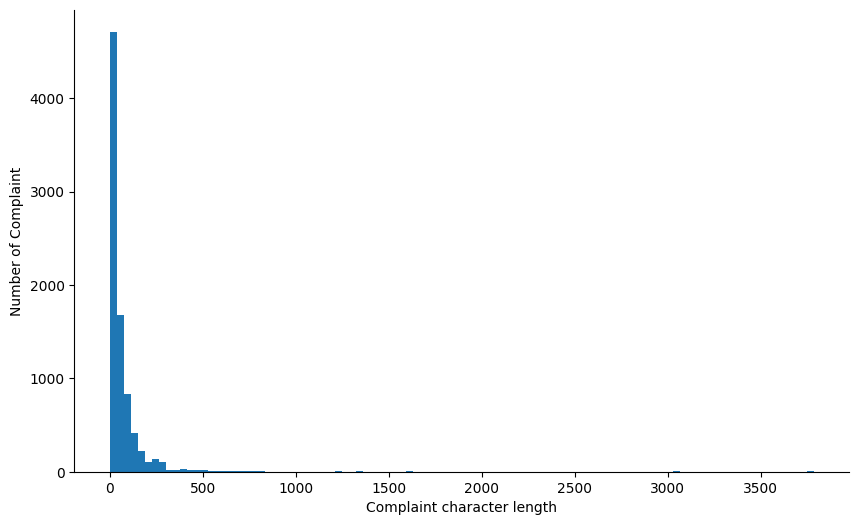

In [196]:
# Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in data_clean.complaint_POS_removed]
plt.hist(doc_lens, bins = 100)
plt.ylabel('Number of Complaint')
plt.xlabel('Complaint character length')
sns.despine();

Find the top 40 words by frequency among all the articles after processing the text.¶


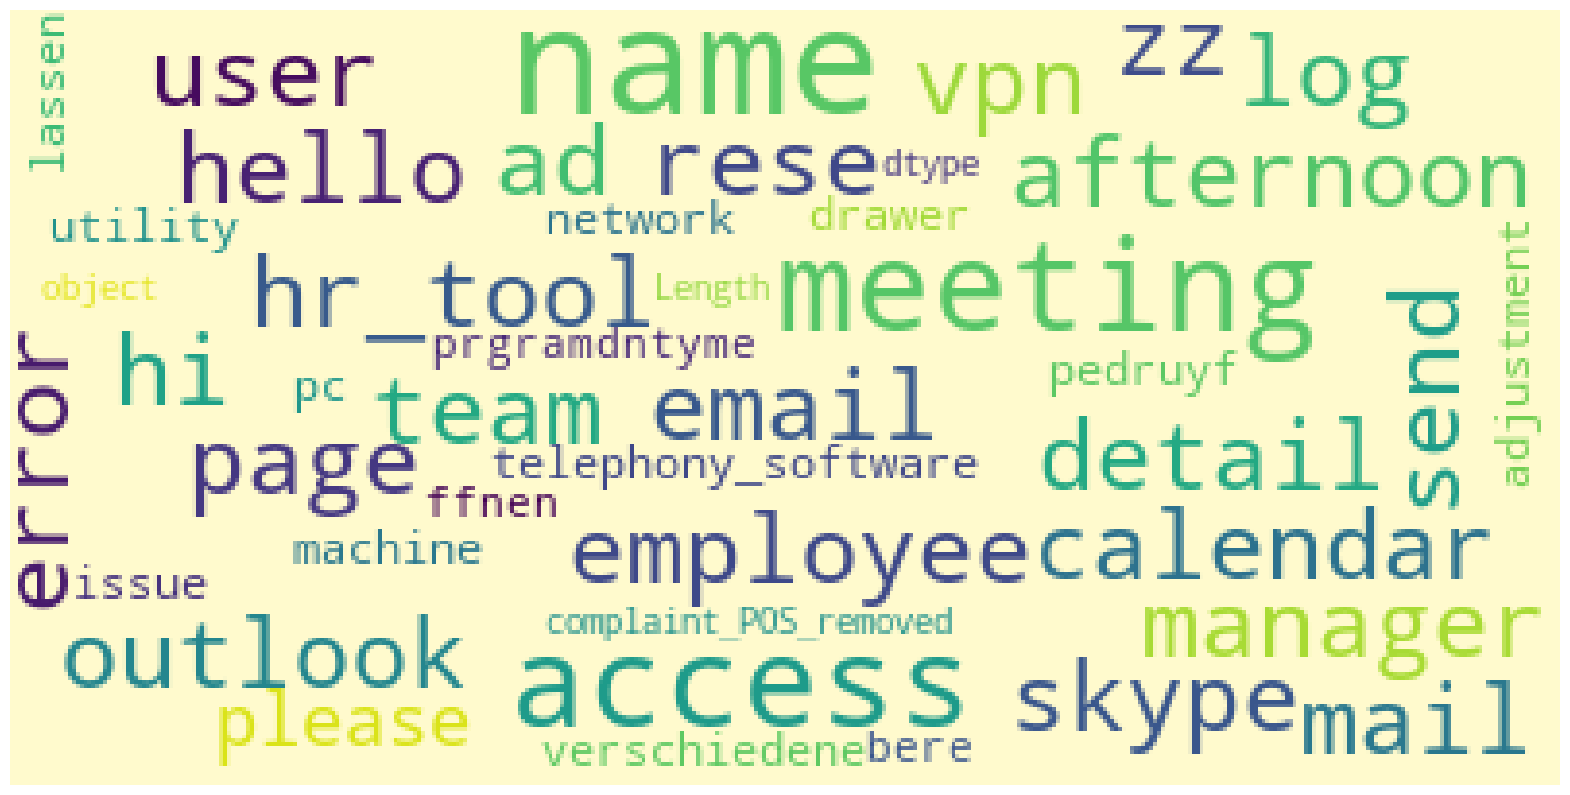

In [199]:
# Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='lemonchiffon',stopwords=set(STOPWORDS),max_words=50,max_font_size=40, random_state=42).generate(str(data_clean['complaint_POS_removed']))

fig = plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


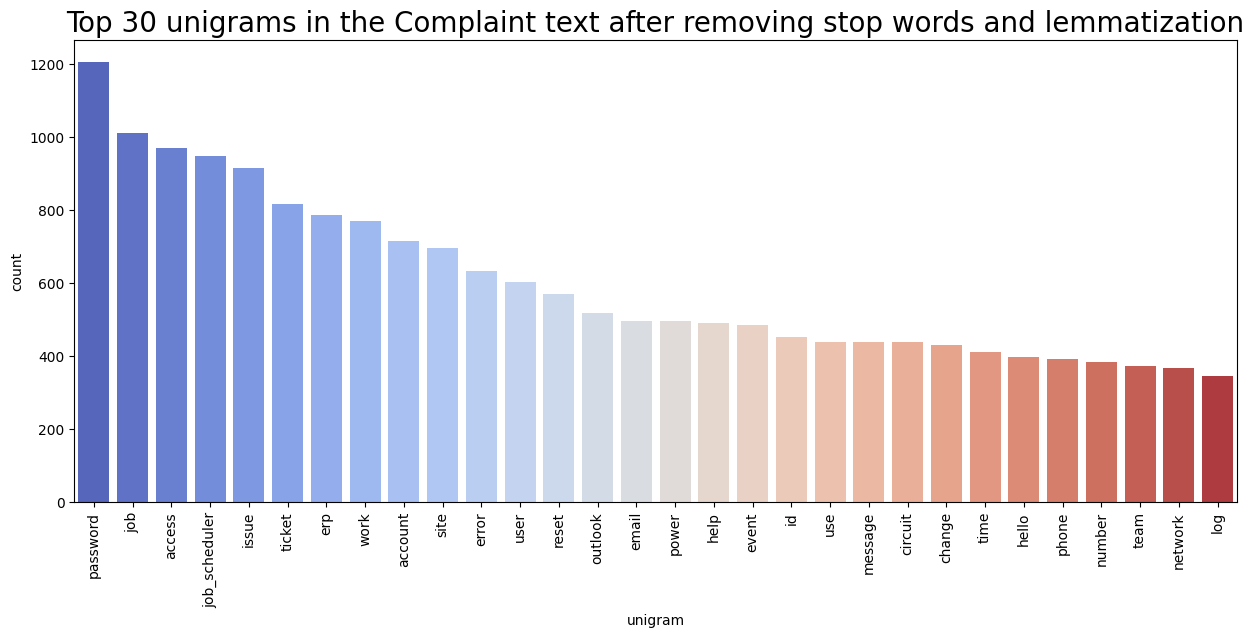

In [200]:
# Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 30 unigrams by frequency among all the complaints
common_words = get_top_n_words(data_clean['complaint_POS_removed'].values.astype('U'), 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='unigram', y='count', data=df2, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 30 unigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

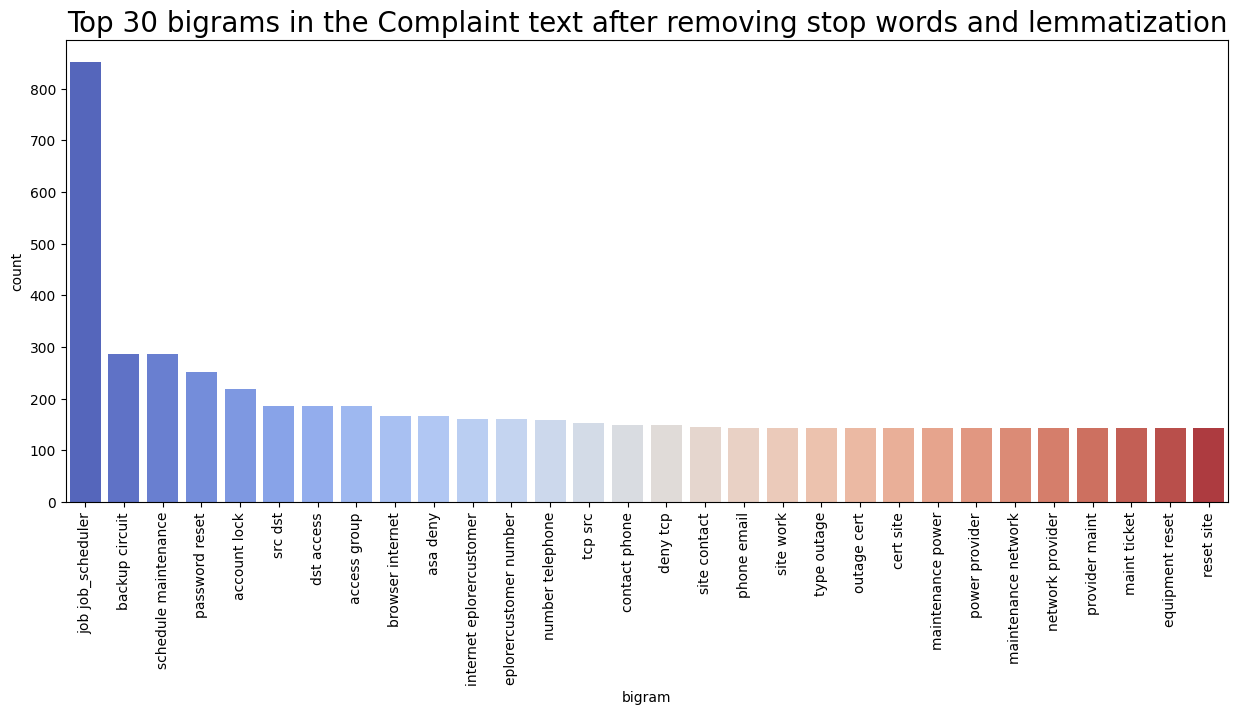

In [201]:
# Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 30 bigrams by frequency among all the complaints
common_words = get_top_n_bigram(data_clean['complaint_POS_removed'].values.astype('U'), 30)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

# Plot the top 30 bigrams
plt.figure(figsize=(15,6))
sns.barplot(x='bigram', y='count', data=df3, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 30 bigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

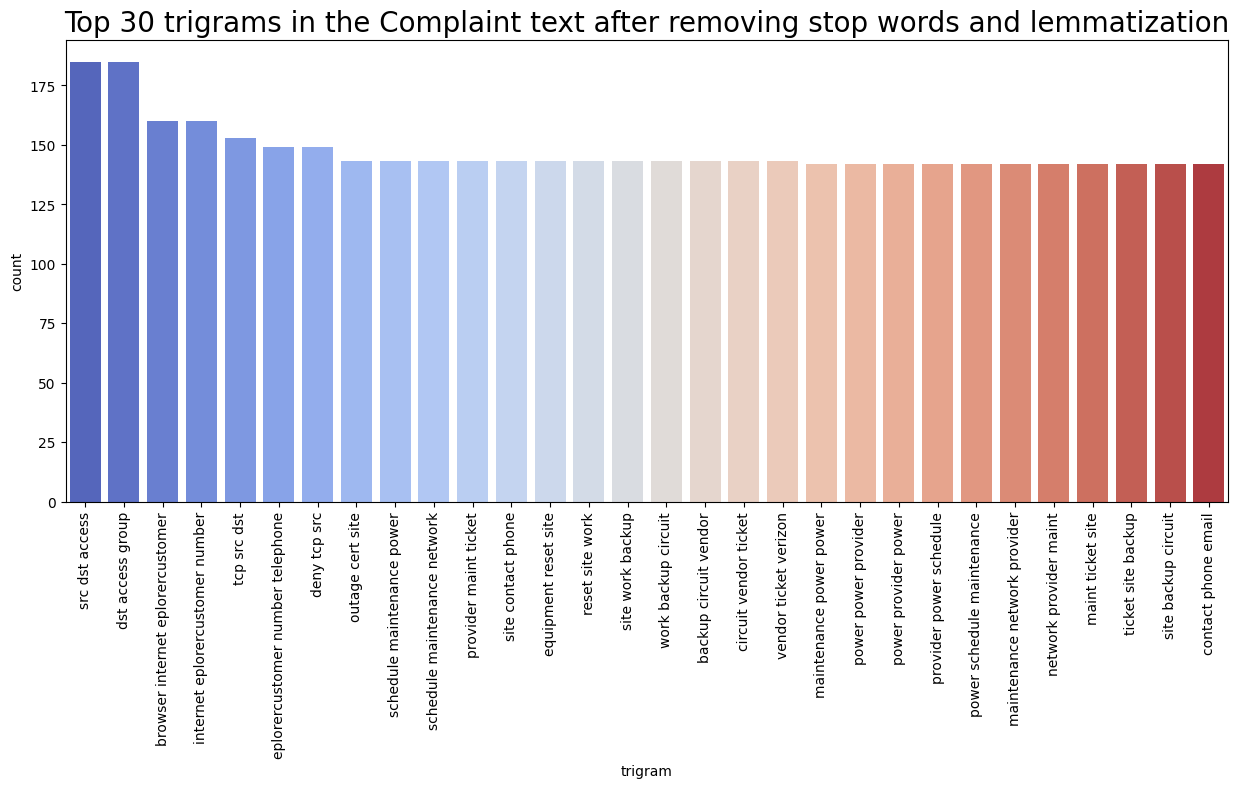

In [202]:
# Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 30 trigrams by frequency among all the complaints
common_words = get_top_n_trigram(data_clean['complaint_POS_removed'].values.astype('U'), 30)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='trigram', y='count', data=df4, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 30 trigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

In [215]:
# top 50 words in group 0
data_clean_group1 = data_clean.loc[data_clean['assignment_group'] == 'GRP_0']
data_clean_group1                            

,description,lemmatized_complaints,assignment_group,complaint_POS_removed,length,Complaint_clean
0,-verified user details.(employee# & manager na...,verify user detail employee manager name check...,GRP_0,user detail employee manager name name ad rese...,97,user detail employee manager name name ad rese...
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hello team meeting skype meeting etc appear ou...,GRP_0,hello team meeting meeting outlook calendar so...,57,hello team meeting meeting outlook calendar so...
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,hi log vpn best,GRP_0,hi log vpn,10,hi log vpn
3,unable to access hr_tool page,unable access hr_tool page,GRP_0,access hr_tool page,19,access hr_tool page
4,skype error,skype error,GRP_0,skype error,11,skype error
...,...,...,...,...,...,...
8405,name:mfeyouli ndobtzpw\nlanguage:\nbrowser:mic...,name mfeyouli ndobtzpwlanguage browser microso...,GRP_0,name ndobtzpwlanguage browser internet eplorer...,116,name ndobtzpwlanguage browser internet eplorer...
8406,account locked,account lock,GRP_0,account lock,12,account lock
8409,hr_tool etime option not visitble,hr_tool etime option visitble,GRP_0,hr_tool etime option,20,hr_tool etime option
8413,telephony_software issue,telephony_software issue,GRP_0,telephony_software issue,24,telephony_software issue


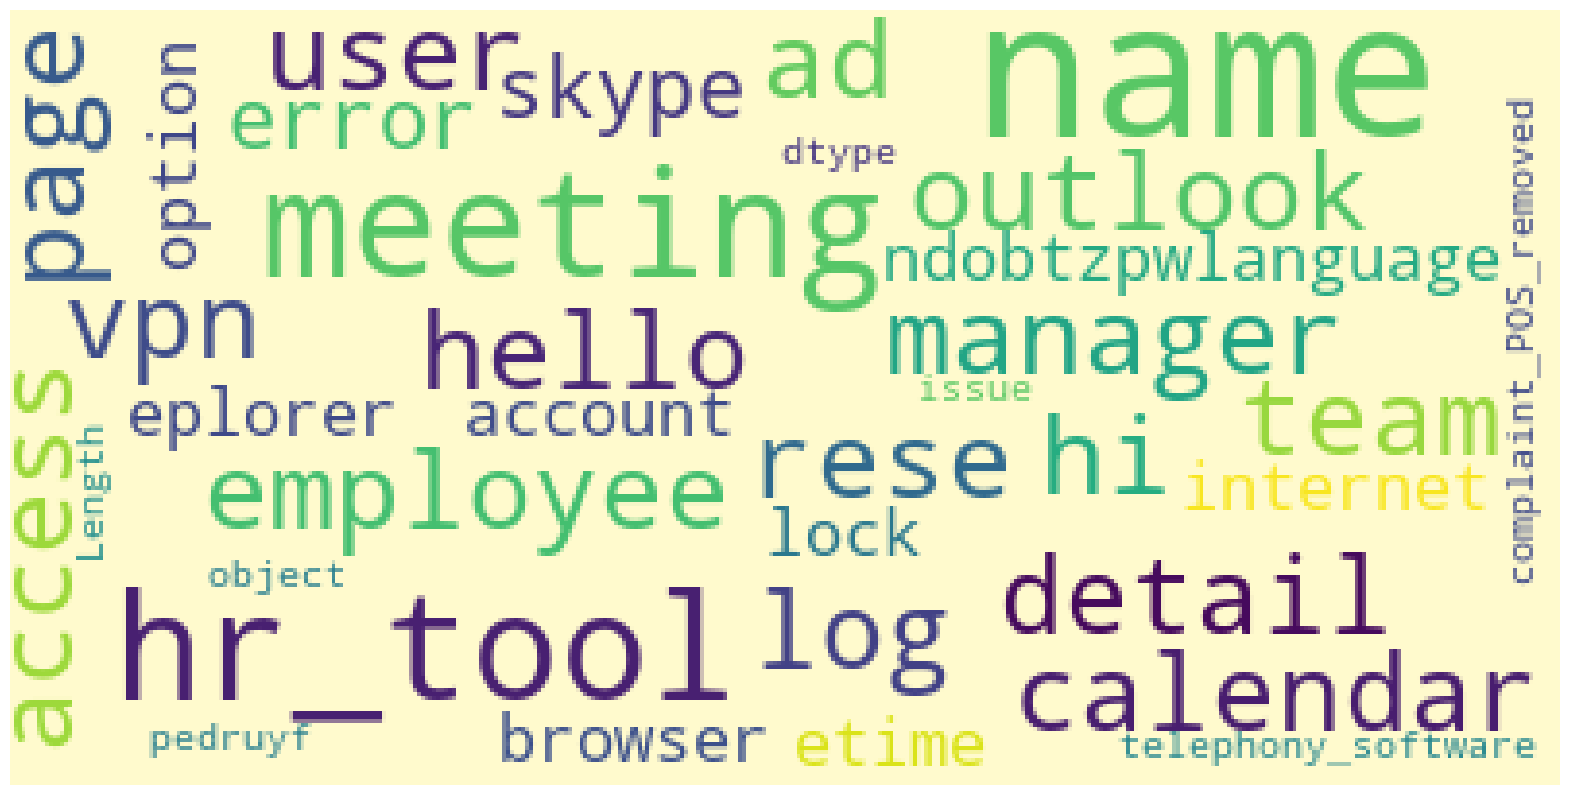

In [218]:
# Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='lemonchiffon',stopwords=set(STOPWORDS),max_words=50,max_font_size=50, random_state=42).generate(str(data_clean_group1['complaint_POS_removed']))

fig = plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words" max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

min_df is used for removing terms that appear too infrequently min_df = 2 means "ignore terms that appear in less than 2 complaints"
Applying the supervised models on the training data created. In this process, we are going to do the following:
Create the vector counts using Count Vectoriser
Transform the word vecotr to tf-idf
Create the train & test data using the train_test_split on the tf-idf & topics


In [204]:
# Write your code to get the Vector count
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data_clean.complaint_POS_removed)
# Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report

In [206]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, data_clean.assignment_group, test_size=0.2, random_state=42)

1. Logistic Regression



In [207]:
# Logistic Regression
lr = LogisticRegression().fit(X_train, y_train)
predicted = lr.predict(X_test)

print(classification_report(y_true=y_test, y_pred=predicted))

              precision    recall  f1-score   support

       GRP_0       0.59      0.99      0.74       783
       GRP_1       0.00      0.00      0.00         3
      GRP_10       1.00      0.03      0.06        31
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.70      0.31      0.43        62
      GRP_13       0.62      0.23      0.33        35
      GRP_14       0.60      0.12      0.20        25
      GRP_15       0.00      0.00      0.00        10
      GRP_16       0.00      0.00      0.00        15
      GRP_17       0.00      0.00      0.00        12
      GRP_18       0.00      0.00      0.00        19
      GRP_19       0.50      0.06      0.11        34
       GRP_2       0.88      0.27      0.41        56
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         5
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.00      0.00      0.00         6
      GRP_24       0.87    

2. Decision Tree



In [208]:
# Decision tree classifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
predicted_dt = dt.predict(X_test)

print(classification_report(y_pred=predicted_dt, y_true=y_test))

              precision    recall  f1-score   support

       GRP_0       0.72      0.80      0.76       783
       GRP_1       0.00      0.00      0.00         3
      GRP_10       0.14      0.06      0.09        31
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.49      0.52      0.50        62
      GRP_13       0.25      0.17      0.20        35
      GRP_14       0.27      0.16      0.20        25
      GRP_15       0.00      0.00      0.00        10
      GRP_16       0.22      0.13      0.17        15
      GRP_17       0.08      0.58      0.14        12
      GRP_18       0.13      0.11      0.12        19
      GRP_19       0.16      0.15      0.15        34
       GRP_2       0.53      0.32      0.40        56
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.25      0.20      0.22         5
      GRP_22       0.14      0.20      0.17         5
      GRP_23       0.29      0.33      0.31         6
      GRP_24       0.63    

3. Random Forest Classifier



In [209]:
rfc = RandomForestClassifier(max_depth=10)
rfc.fit(X_train, y_train)
predicted_rf = rfc.predict(X_test)

print(classification_report(y_pred=predicted_rf, y_true=y_test))

              precision    recall  f1-score   support

       GRP_0       0.48      1.00      0.64       783
       GRP_1       0.00      0.00      0.00         3
      GRP_10       0.00      0.00      0.00        31
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.00      0.00      0.00        62
      GRP_13       0.00      0.00      0.00        35
      GRP_14       0.00      0.00      0.00        25
      GRP_15       0.00      0.00      0.00        10
      GRP_16       0.00      0.00      0.00        15
      GRP_17       0.00      0.00      0.00        12
      GRP_18       0.00      0.00      0.00        19
      GRP_19       0.00      0.00      0.00        34
       GRP_2       0.50      0.04      0.07        56
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         5
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.00      0.00      0.00         6
      GRP_24       0.00    

4. Gaussian Naive Bayes



In [210]:
nb = GaussianNB().fit(X_train.toarray(), y_train)
predicted_nb = nb.predict(X_test.toarray())

print(classification_report(y_pred=predicted_nb, y_true=y_test))

              precision    recall  f1-score   support

       GRP_0       0.55      0.32      0.40       783
       GRP_1       0.17      0.33      0.22         3
      GRP_10       0.35      0.19      0.25        31
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.33      0.23      0.27        62
      GRP_13       0.32      0.29      0.30        35
      GRP_14       0.26      0.40      0.31        25
      GRP_15       0.08      0.10      0.09        10
      GRP_16       0.13      0.20      0.16        15
      GRP_17       0.00      0.00      0.00        12
      GRP_18       0.21      0.16      0.18        19
      GRP_19       0.15      0.29      0.20        34
       GRP_2       0.33      0.41      0.37        56
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         5
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.14      0.17      0.15         6
      GRP_24       0.78    